# Importing Necessary Libraries

In [4]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore')

#Creating the Data from CSV file for the analysis

In [35]:
df=pd.read_csv('/content/loan.csv')

In [6]:
df.shape

(39717, 111)

In [7]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


# Taking all the empty coloumn in one variable

In [36]:
empty_cols = [col for col in df.columns if df[col].isnull().all()]

#Verifying the sum of null columns(should match up to number of rows in dataset)

In [9]:
for i in empty_cols:
  print(df[i].isnull().sum())

39717
39717
39717
39717
39717
39717
39717
39717
39717
39717
39717
39717
39717
39717
39717
39717
39717
39717
39717
39717
39717
39717
39717
39717
39717
39717
39717
39717
39717
39717
39717
39717
39717
39717
39717
39717
39717
39717
39717
39717
39717
39717
39717
39717
39717
39717
39717
39717
39717
39717
39717
39717
39717
39717


#Dropping the columns which are having entire column null values.

In [37]:
#Dropping columns
df.drop(empty_cols,
        axis=1,
        inplace=True)

In [38]:
#Droping column who's values are less than 25% of data
df.drop(['mths_since_last_record','next_pymnt_d'],axis=1,inplace=True)

In [39]:
# Dropping unnecessary columns
df.drop(['delinq_2yrs','earliest_cr_line','inq_last_6mths','open_acc','pub_rec','revol_bal','revol_util','total_acc','out_prncp','out_prncp_inv','total_pymnt_inv','total_rec_int','total_rec_late_fee','total_rec_prncp','recoveries','collection_recovery_fee','last_credit_pull_d','last_pymnt_amnt','last_pymnt_d','application_type'],axis=1,inplace=True)

In [40]:
#Selecting borrowers other than Current values
df = df[~(df['loan_status']=='Current')]

In [41]:
df['int_rate']=df['int_rate'].apply(lambda x: float(x[:-1]))

In [42]:
df['emp_length'].mode()[0]

'10+ years'

In [43]:
df['emp_length'].value_counts()

10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64

In [44]:
#Filling null values of emp_lenght mode
df['emp_length']=df['emp_length'].fillna(df['emp_length'].mode()[0])

In [45]:
#created Issue_loan_Month from issue_d
df['Issue_Loan_Month']=df['issue_d'].apply(lambda x: 1 if x[:3]=='Jan' else (2 if x[:3]=='Feb' else(3 if x[:3]=='Mar' else(4 if x[:3]=='Apr' else (5 if x[:3]=='May' else (6 if x[:3]=='Jun' else(7 if x[:3]=='Jul' else (8 if x[:3]=='Aug' else (9 if x[:3]=='Sep' else(10 if x[:3]=='Oct' else(11 if x[:3]=='Nov' else 12)))))))))))

(array([3.8569e+04, 6.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([4.0000e+03, 1.2032e+06, 2.4024e+06, 3.6016e+06, 4.8008e+06,
        6.0000e+06]),
 <BarContainer object of 5 artists>)

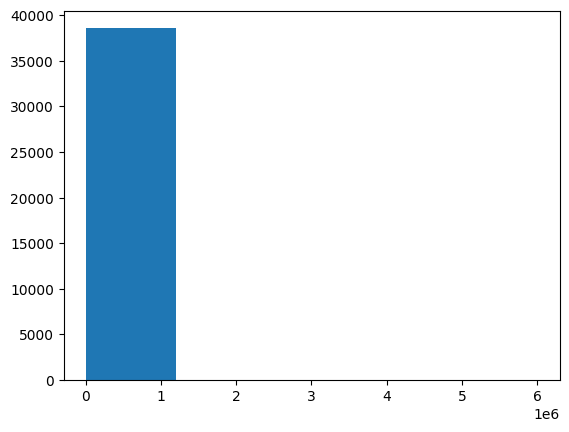

In [46]:
#Plotting outliers
plt.hist(df['annual_inc'],bins=5)

In [47]:
#Removed Outliers from Annual_inc column
df=df[df['annual_inc']<1000000]

In [48]:
#Converting term column to integer
df['term']=df['term'].apply(lambda x: int(x[:3]))

In [49]:
df['term']

0        36
1        60
2        36
3        36
5        36
         ..
39712    36
39713    36
39714    36
39715    36
39716    36
Name: term, Length: 38563, dtype: int64

In [111]:
df.loan_status.value_counts()

Fully Paid     32937
Charged Off     5626
Name: loan_status, dtype: int64

In [87]:
#Creating 2 different dataset for comparison between 'Fully paid' and 'Charged off' borrowers
df_only_Fully_Paid= df[df['loan_status']=='Fully Paid']

df_only_Charged_Off= df[df['loan_status']=='Charged Off']

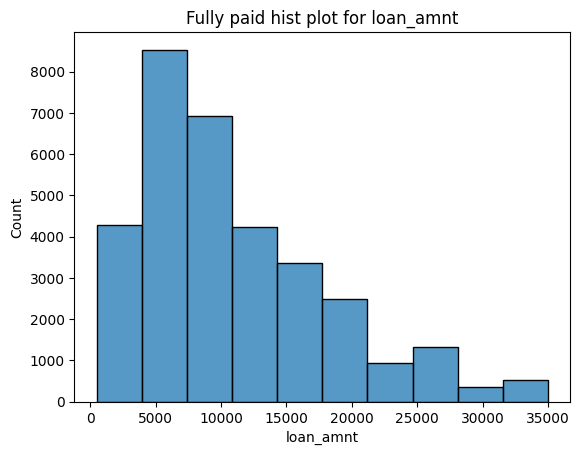

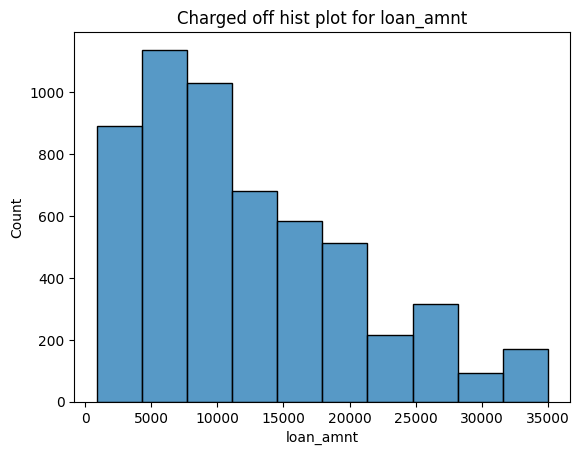

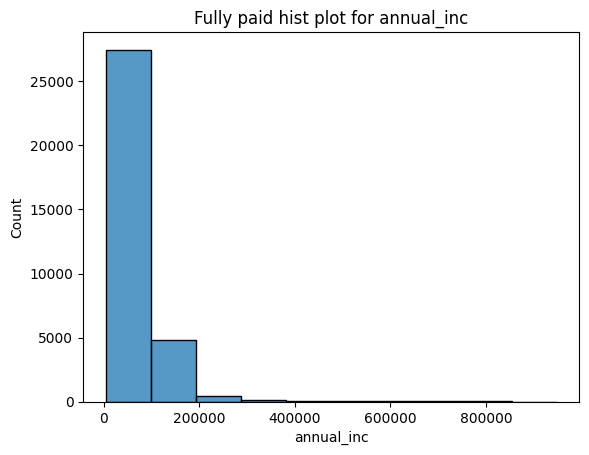

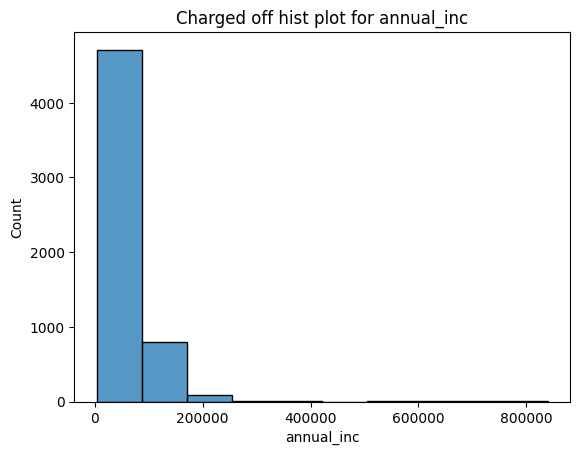

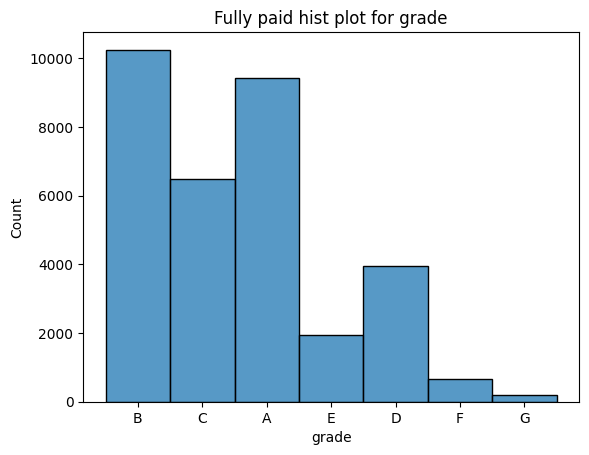

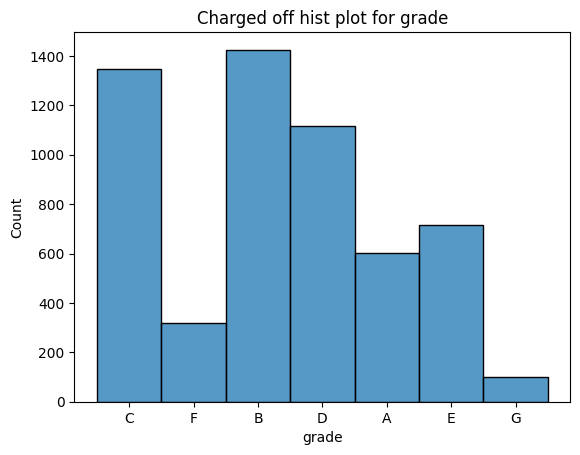

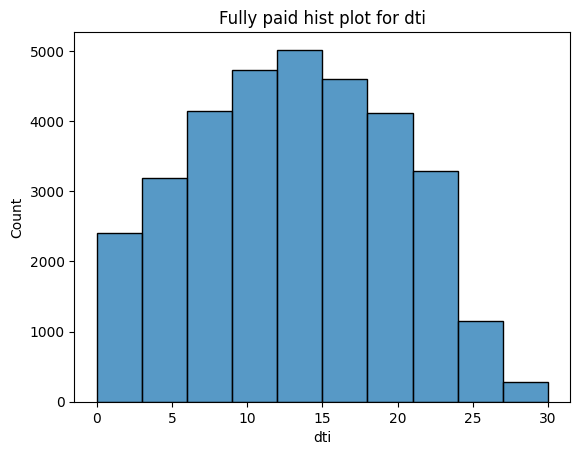

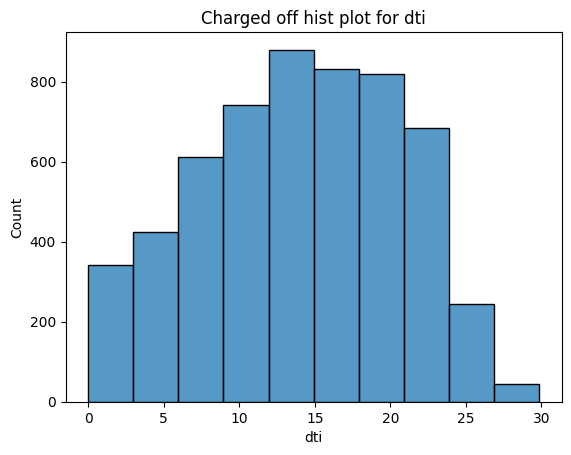

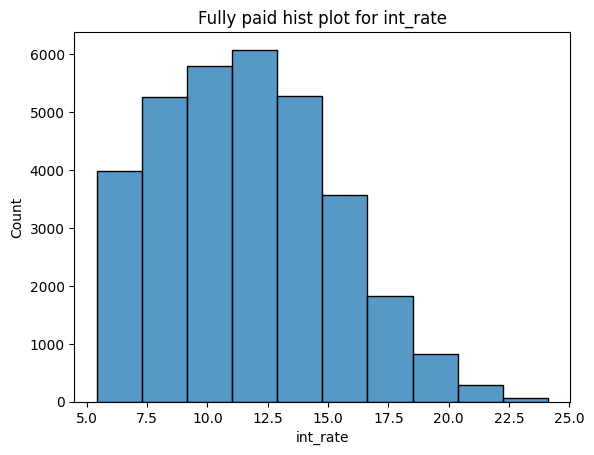

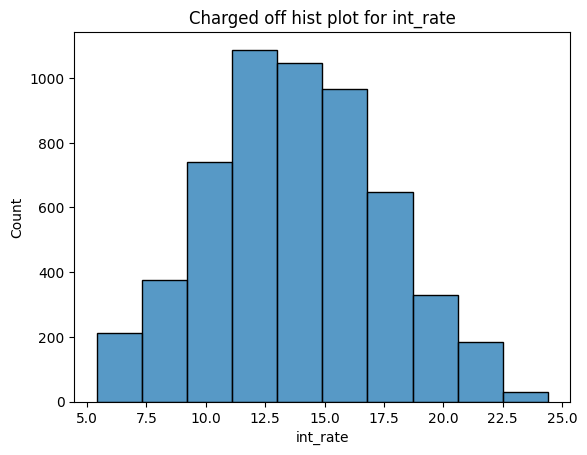

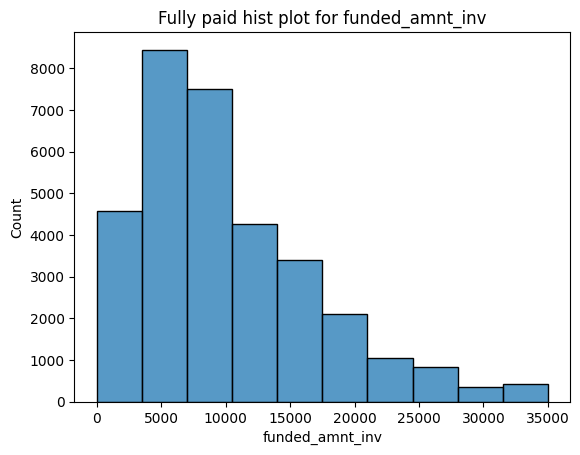

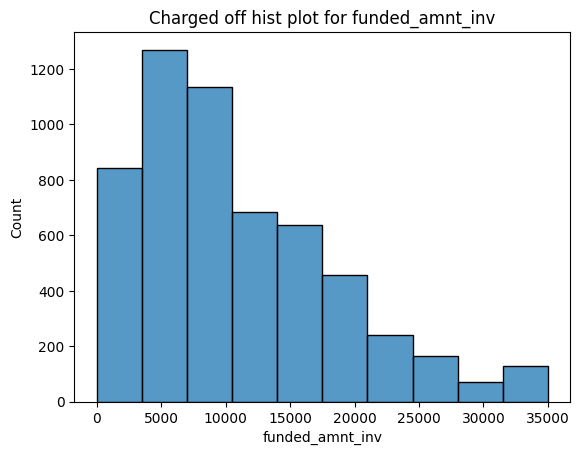

In [112]:

for i in ['loan_amnt','annual_inc','grade','dti','int_rate','funded_amnt_inv']:
  sns.histplot(data=df_only_Fully_Paid,x=i, bins=10)
  plt.title("Fully paid hist plot for "+i)
  plt.show()
  sns.histplot(data=df_only_Charged_Off,x=i, bins=10)
  plt.title("Charged off hist plot for "+i)
  plt.show()



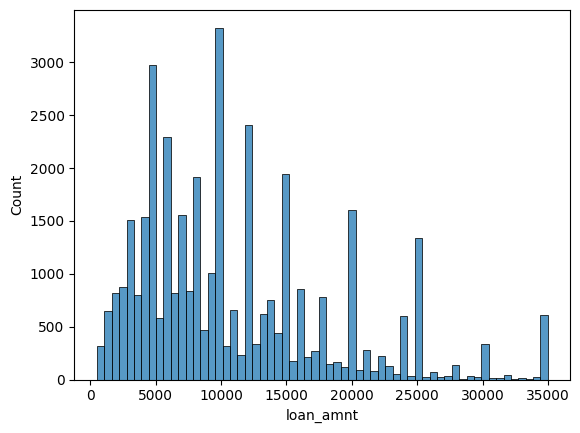

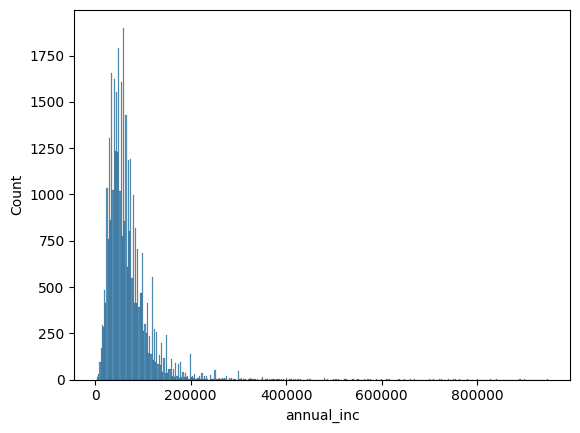

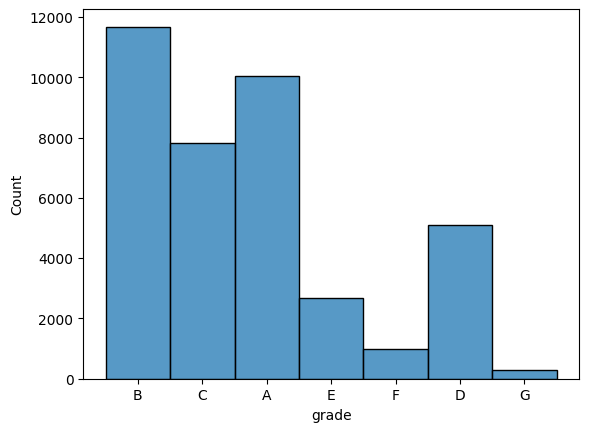

In [86]:
for i in ['loan_amnt','annual_inc','grade','dti']:
  sns.histplot(df[i])
  plt.show()

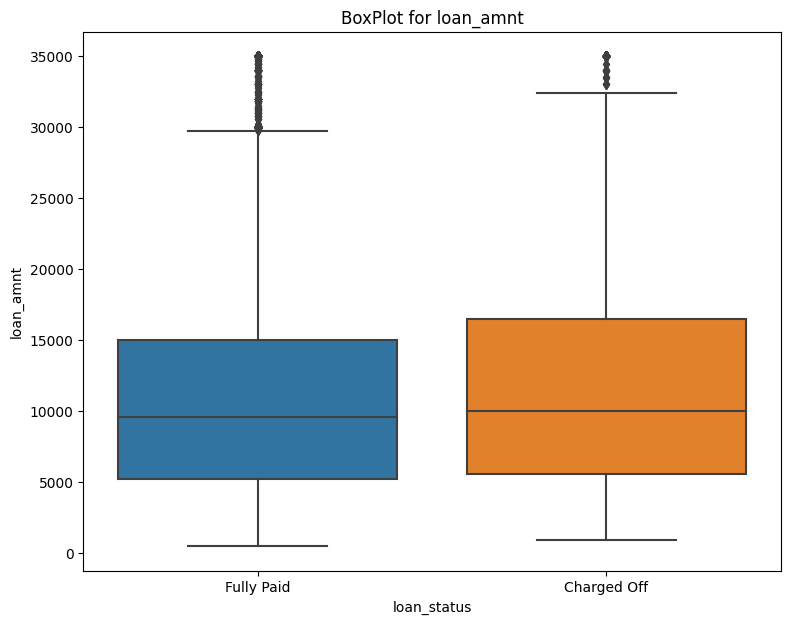

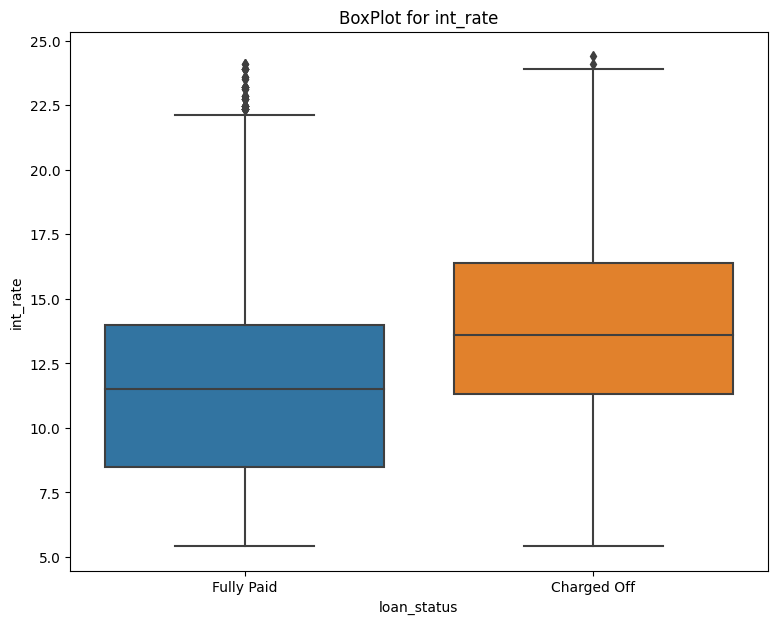

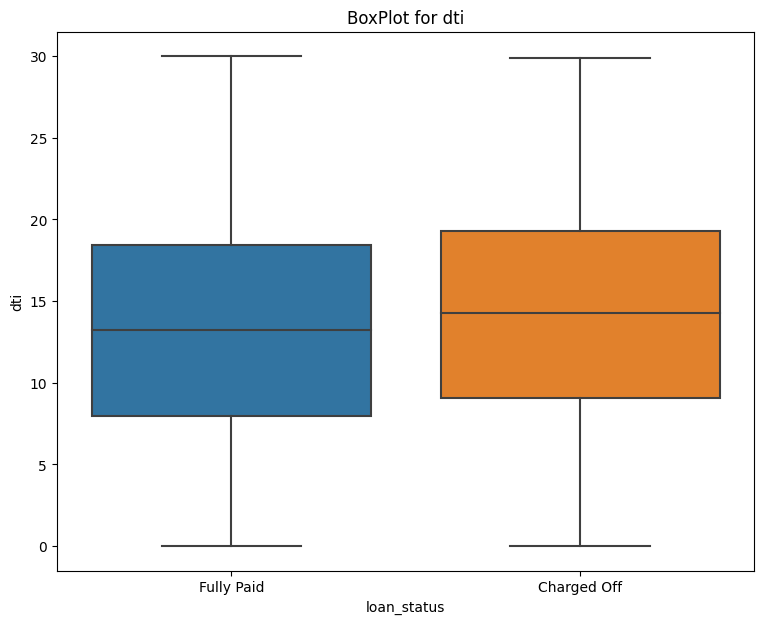

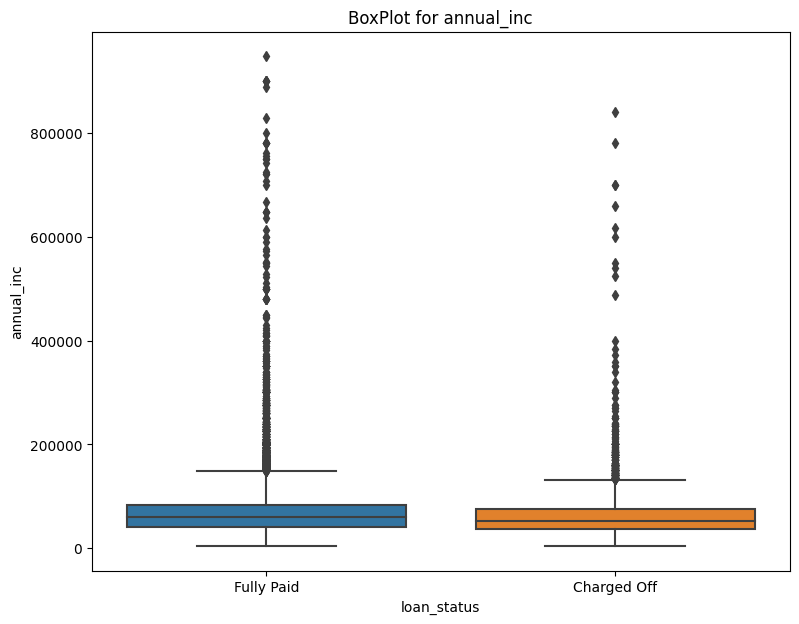

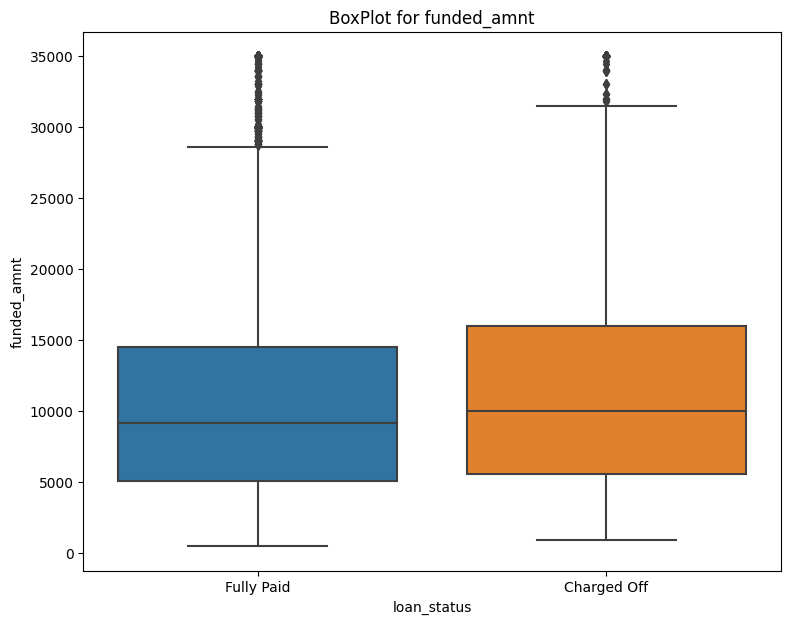

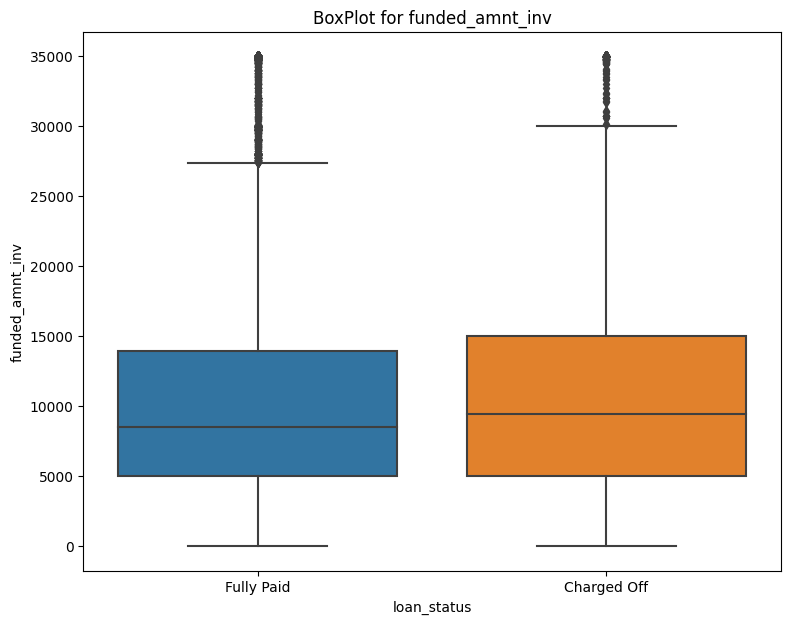

In [82]:
for i in ['loan_amnt','int_rate','dti','annual_inc','funded_amnt','funded_amnt_inv']:
  plt.figure(figsize=[9,7])
  sns.boxplot(data=df,x="loan_status",y=i)
  plt.title("BoxPlot for "+i)
  plt.show()
  
  

<Axes: xlabel='loan_status', ylabel='int_rate'>

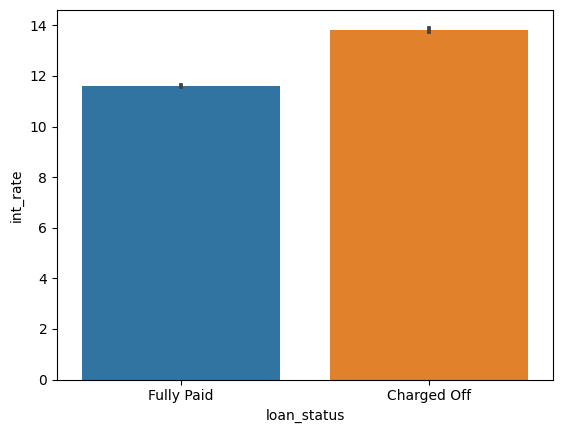

In [52]:
sns.barplot(x=df["loan_status"],y=df["int_rate"])

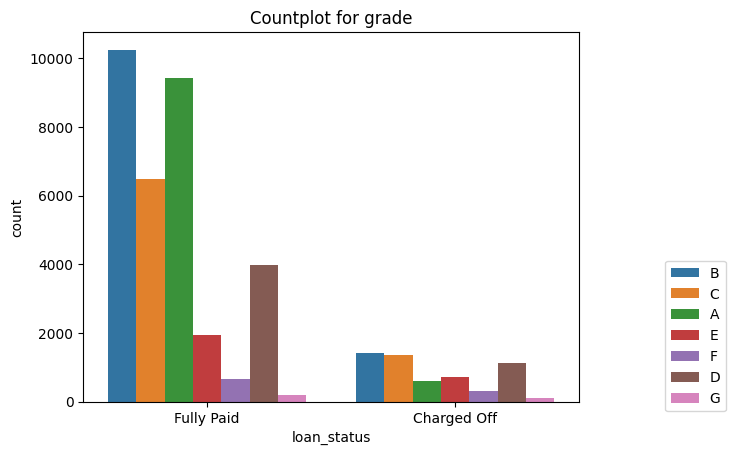

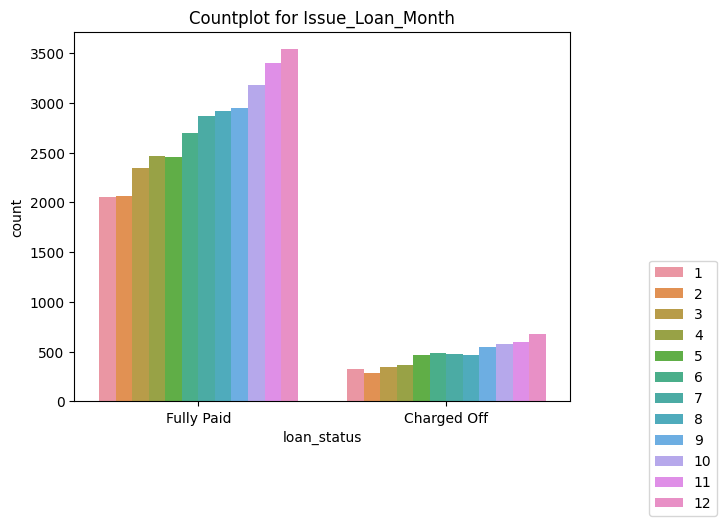

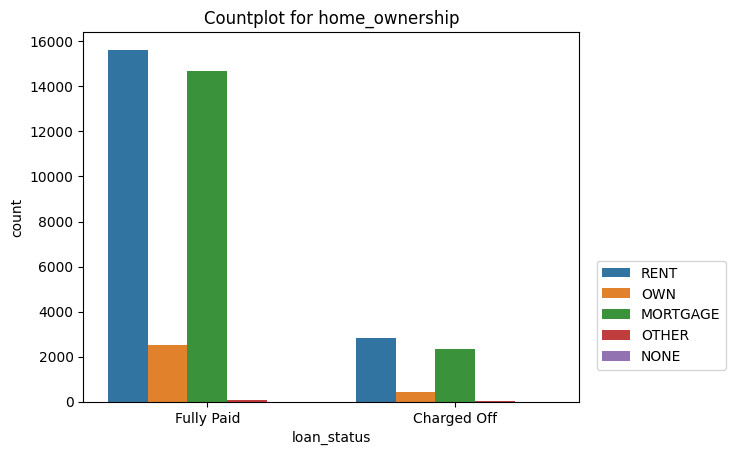

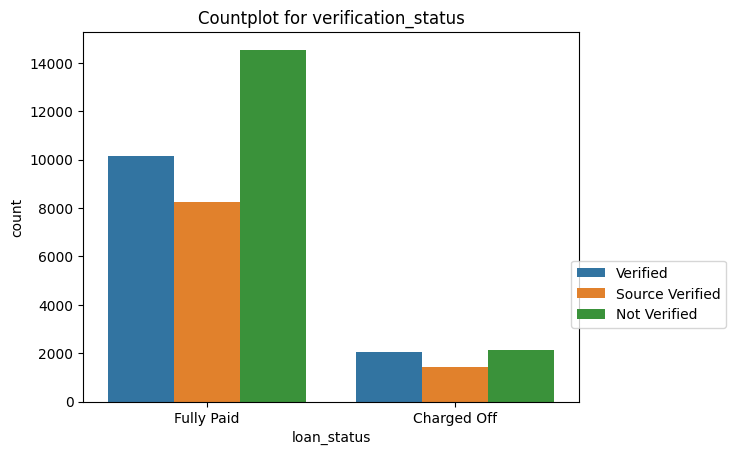

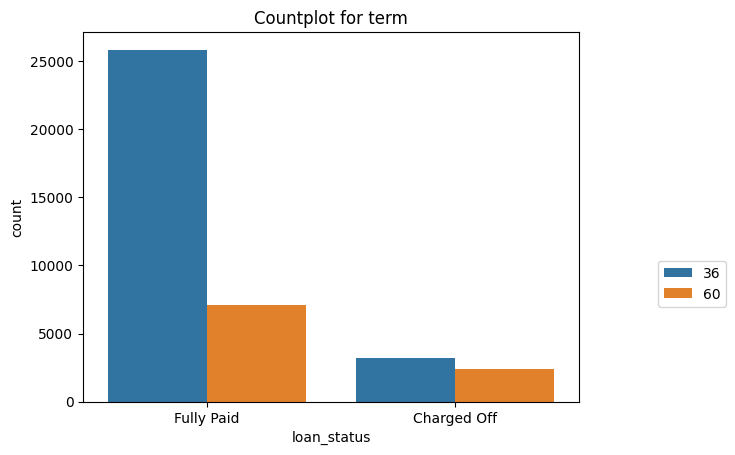

In [53]:
for i in ['grade','Issue_Loan_Month','home_ownership','verification_status','term']:
  sns.countplot(x="loan_status",hue=df[i],data=df)
  plt.title("Countplot for "+i)
  plt.legend(bbox_to_anchor=(1.31,0.4))
  plt.show()